<a href="https://colab.research.google.com/github/l3ft-debug/youtube-stats-2025/blob/main/YouTube_Statistics_2025_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YouTube Video Statistics & Metadata 2025 Analysis

Analyze and visualize YouTube video statistics for 2025 using Python and pandas.

**Steps:**
- Load CSV data (from Google Drive or upload)
- Explore top videos, channels, categories
- Visualize trends and distributions


In [1]:
# Install required packages (if not already installed)
!pip install pandas matplotlib seaborn --quiet

## 1. Load Data

Choose ONE method below:
- **Google Drive:** Mount and load file from Drive
- **Upload from local:** Use file upload widget

In [19]:
# --- Option 1: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# Update this path to where your CSV is located in Drive
csv_path = '/content/Youtube Data.csv'  # <-- edit as needed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# --- Load data into DataFrame ---
import pandas as pd
df = pd.read_csv('Youtube Data.csv')

## 2. Data Preparation

Convert columns to appropriate data types. Adjust these column names if your CSV uses different headers.

In [22]:
# Convert columns (edit these if your columns have different names)
for col in ['view_count', 'like_count', 'comment_count']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

if 'published_at' in df.columns:
    df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   video_id        401 non-null    object             
 1   title           401 non-null    object             
 2   description     401 non-null    object             
 3   published_at    401 non-null    datetime64[ns, UTC]
 4   channel_id      401 non-null    object             
 5   channel_title   401 non-null    object             
 6   tags            268 non-null    object             
 7   category_id     401 non-null    object             
 8   view_count      401 non-null    float64            
 9   like_count      401 non-null    float64            
 10  favorite_count  400 non-null    float64            
 11  comment_count   401 non-null    float64            
 12  duration        400 non-null    object             
 13  definition      400 non-null    obj

## 3. Summary Statistics & Top Performers

In [23]:
# Top 10 Videos by Views
df.sort_values('view_count', ascending=False).head(10)[['title','channel_title','view_count']]

,title,channel_title,view_count
1,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,Call of Duty,5991411.0
12,CORTIS (코르티스) 'What You Want' Official MV,HYBE LABELS,5019274.0
3,Twenty One Pilots - Drum Show (Official Video),twenty one pilots,1973975.0
34,We PEAKed too hard...,SMii7Y,1596740.0
94,We PEAKed too hard...,SMii7Y,1596740.0
319,We PEAKed too hard...,SMii7Y,1596740.0
349,We PEAKed too hard...,SMii7Y,1596740.0
334,We PEAKed too hard...,SMii7Y,1596740.0
379,We PEAKed too hard...,SMii7Y,1596740.0
20,We PEAKed too hard...,SMii7Y,1596740.0


In [24]:
# Top 10 Channels by Total Views
top_channels = df.groupby('channel_title').agg({
    'video_id': 'count',
    'view_count': 'sum',
    'like_count': 'sum',
    'comment_count': 'sum'
}).rename(columns={'video_id':'video_count'})

top_channels.sort_values('view_count', ascending=False).head(10)

,video_count,view_count,like_count,comment_count
channel_title,,,,
SMii7Y,26,41515240.0,1919164.0,65520.0
Typical Gamer,26,21214700.0,81822.0,494.0
IFC Films,26,9689940.0,309296.0,29770.0
World of Warcraft,26,8738002.0,364390.0,56862.0
SANTA RM,25,8643325.0,1599500.0,78425.0
Call of Duty,1,5991411.0,25012.0,13127.0
Atari,26,5580198.0,508092.0,125138.0
LatinHype,26,5356728.0,27664.0,286.0
Sonic the Hedgehog,26,5123170.0,544986.0,71734.0


In [25]:
# Category Breakdown (if category_id present)
if 'category_id' in df.columns:
    cat = df.groupby('category_id').agg({'video_id':'count','view_count':'sum'}).rename(columns={'video_id':'video_count'})
    cat
else:
    print('No category_id column in data.')

## 4. Visualization
### (edit `by='view_count'` to change metric, e.g. 'like_count')

/tmp/ipython-input-766542228.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='view_count', y='title', data=top, palette='viridis')
/tmp/ipython-input-766542228.py:11: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-766542228.py:11: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-766542228.py:11: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-766542228.py:11: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) Dej

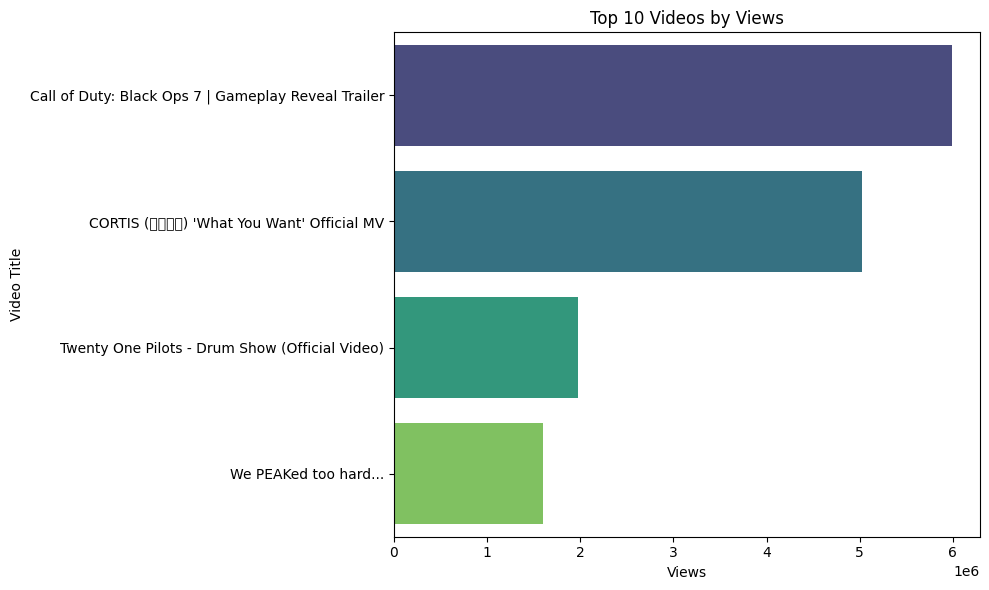

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Videos by Views
top = df.sort_values('view_count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='view_count', y='title', data=top, palette='viridis')
plt.title('Top 10 Videos by Views')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

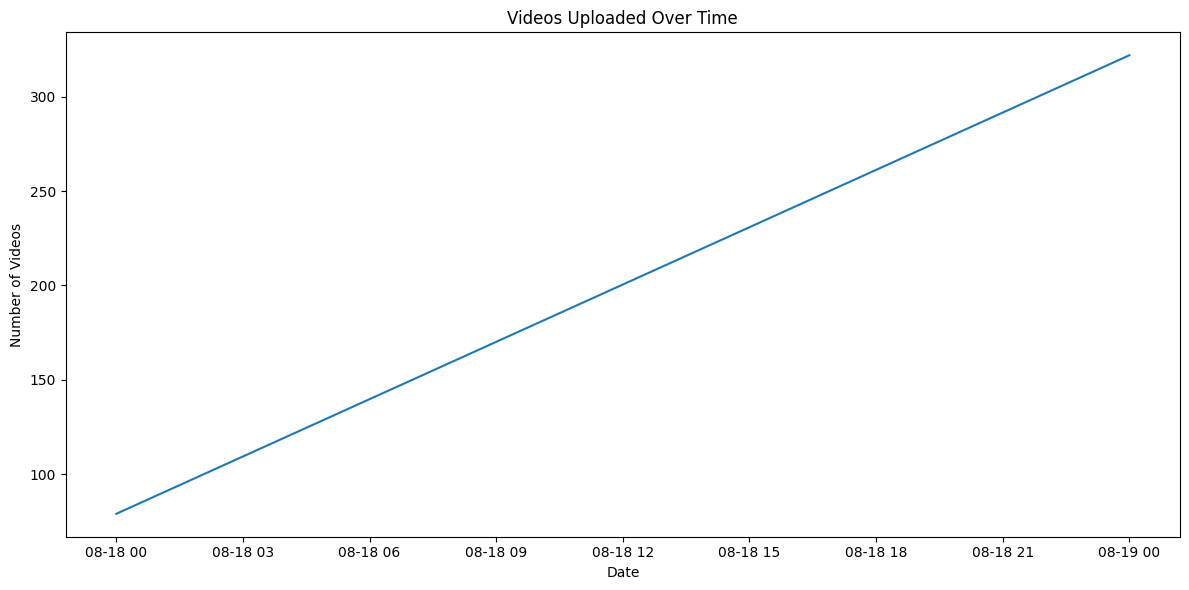

In [27]:
# Upload trend over time (if published_at present)
if 'published_at' in df.columns:
    df['date'] = df['published_at'].dt.date
    daily = df.groupby('date').size()
    plt.figure(figsize=(12,6))
    daily.plot()
    plt.title('Videos Uploaded Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Videos')
    plt.tight_layout()
    plt.show()
else:
    print('No published_at column in data.')

/tmp/ipython-input-1937845980.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


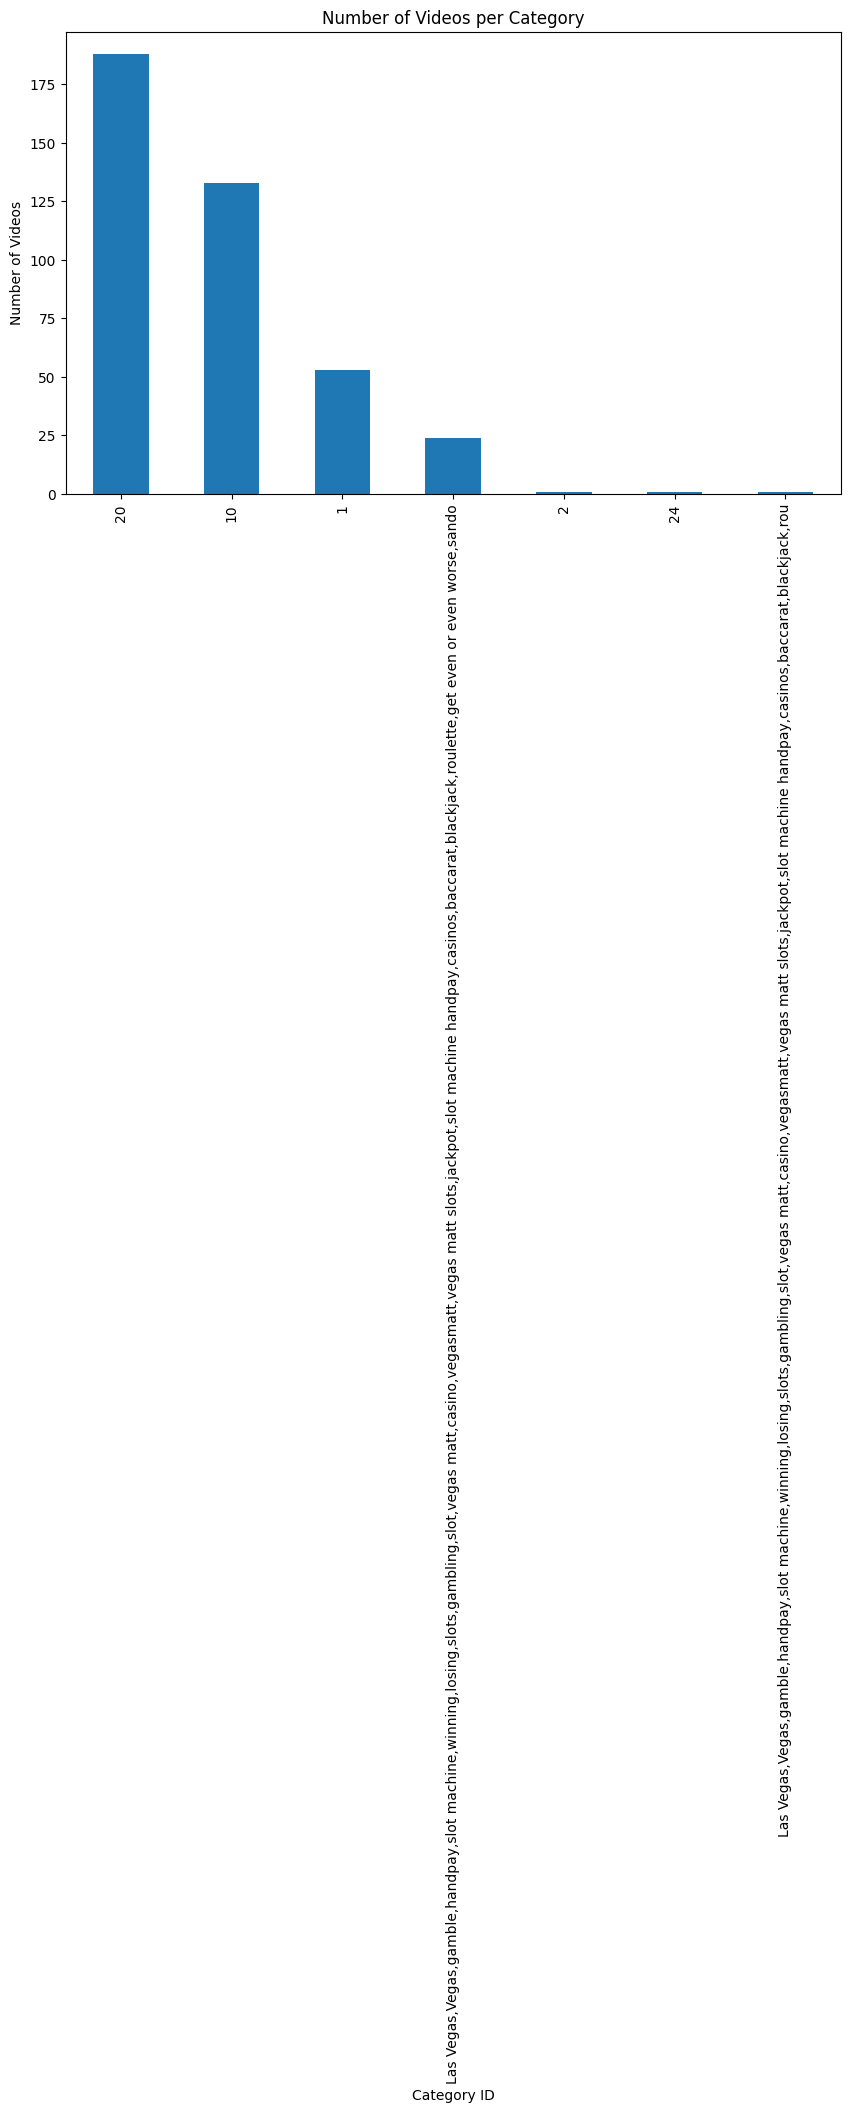

In [28]:
# Videos per category (bar chart)
if 'category_id' in df.columns:
    cat = df['category_id'].value_counts()
    plt.figure(figsize=(10,6))
    cat.plot(kind='bar')
    plt.title('Number of Videos per Category')
    plt.xlabel('Category ID')
    plt.ylabel('Number of Videos')
    plt.tight_layout()
    plt.show()
else:
    print('No category_id column in data.')

## 5. Explore More!

- Try changing sorting columns (like_count, comment_count)
- Add histograms or scatter plots
- Merge with YouTube API category names for prettier charts

> **Tip:** If your columns have different names, adjust the code accordingly!